In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [30]:
data=pd.read_csv('car_price_prediction_.csv')
data

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Audi,2020,2.4,Petrol,Automatic,22650,Like New,61384.10,Q5
2496,2497,Audi,2001,5.7,Hybrid,Manual,77701,Like New,24710.35,A3
2497,2498,Ford,2021,1.1,Hybrid,Manual,272827,Like New,29902.45,Fiesta
2498,2499,Audi,2002,4.5,Diesel,Manual,229164,Like New,46085.67,Q5


# **FEATURES :**
1. Car ID - Unique number given for all cars
2. Brand - Brand name of each cars
3. Year - Shows the year of manufacturing
4. Engine size - Shows the cubic capacity of the car
5. Fuel Type - Shows the type of fuel source
6. Transmission - Shows the type of gearbox wheather Automatic or Manaul
7. Mileage - Shows the mileage of the cars
8. Condition - Tells the condition of each cars
9. Price - Shows the price for each cars
10. Model - Shows the model of each cars


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


# **EDA :**
1. What is the distribution of the target variable (Price)?
📊 Plot: Histogram + KDE
2. How many cars are listed per brand?
📊 Plot: Bar chart
3. What is the average price for each brand?
📊 Plot: Bar chart (sorted by price)
4. Which car models appear most frequently?
📊 Plot: Horizontal bar chart
5. How does price vary with car manufacturing year?
📊 Plot: Line plot or scatter plot
6. How many cars are petrol, diesel, CNG, electric?
📊 Plot: Pie chart or bar chart
7. What is the average price for each fuel type?
📊 Plot: Bar chart
8. Does transmission type (Manual/Automatic) affect price?
📊 Plot: Boxplot
10. Does engine size affect price?
📊 Plot: Scatter plot
11. Do newer cars have higher mileage?
📊 Plot: Scatter plot
13. What is the condition distribution (Used/LIke New/New)?
📊 Plot: Pie or bar chart
18. How does price differ by brand + fuel type combination?
📊 Plot: Grouped bar chart
19. Are certain brands more fuel-efficient?
📊 Plot: Boxplot of mileage by brand
20. How are engine size and mileage related?
📊 Plot: Scatter plot
21. Which features have strong pairwise relationships?
📊 Plot: Pairplot (if allowed), or multiple scatter plots
22. What is the distribution of car ages in the dataset?
📊 Plot: Histogram

<Axes: xlabel='Price', ylabel='Count'>

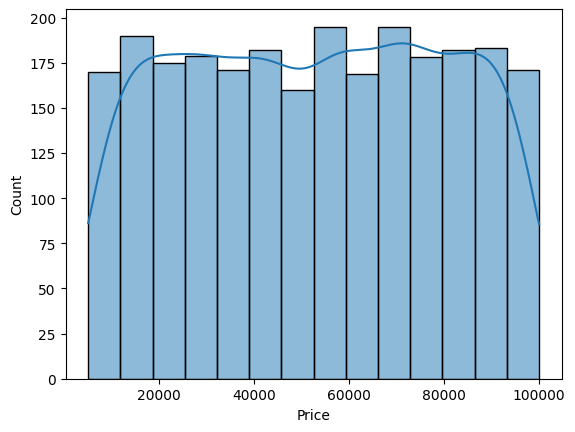

In [32]:
# 1.What is the distribution of the target variable (Price)? 📊 Plot: Histogram + KDE
sns.histplot(data['Price'],kde=True)

This shows the price distribution of the dataset

In [33]:
# 2.How many cars are listed per brand? 📊 Plot: Bar chart
a=data['Brand'].value_counts()
a

,count
Brand,
Toyota,374
Audi,368
BMW,358
Mercedes,353
Honda,352
Tesla,348
Ford,347


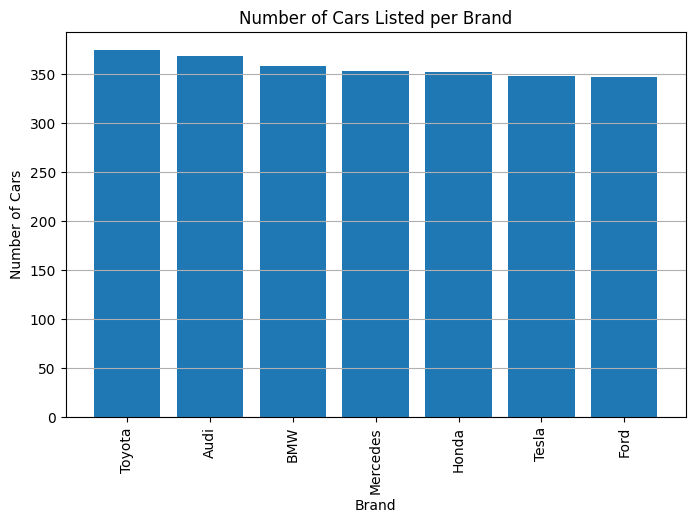

In [34]:
plt.figure(figsize=(8,5))
plt.bar(a.index, a.values)
plt.xlabel("Brand")
plt.ylabel("Number of Cars")
plt.title("Number of Cars Listed per Brand")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

This shows the number of cars per brand

*Toyata has the highest number of cars*

*Ford has the least number of cars*


In [35]:
# 3.What is the average price for each brand? 📊 Plot: Bar chart (sorted by price)
b=data.groupby('Brand')['Price'].mean()
b

,Price
Brand,
Audi,51953.424810
BMW,54157.114385
Ford,51593.254813
Honda,52050.283949
Mercedes,53191.090085
Tesla,53475.547471
Toyota,52078.728235


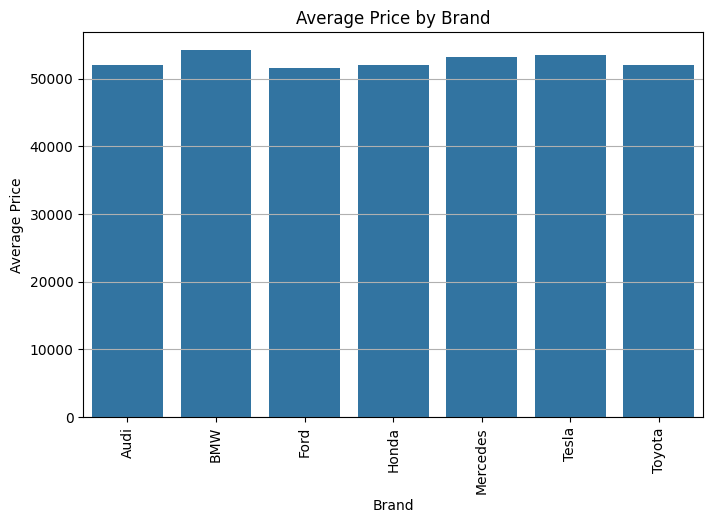

In [36]:
plt.figure(figsize=(8, 5))
sns.barplot(x=b.index, y=b.values)
plt.xticks(rotation=90)
plt.title("Average Price by Brand")
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.grid(axis='y')
plt.show()

This shows the average price for all brands

*The average price is 510000 for all brands*

In [37]:
# 4.Which car models appear most frequently? 📊 Plot: Horizontal bar chart
c=data['Model'].value_counts().head(20)
c

,count
Model,
Fiesta,103
Corolla,103
A3,98
A4,96
Q7,95
CR-V,95
5 Series,93
3 Series,93
Prius,93


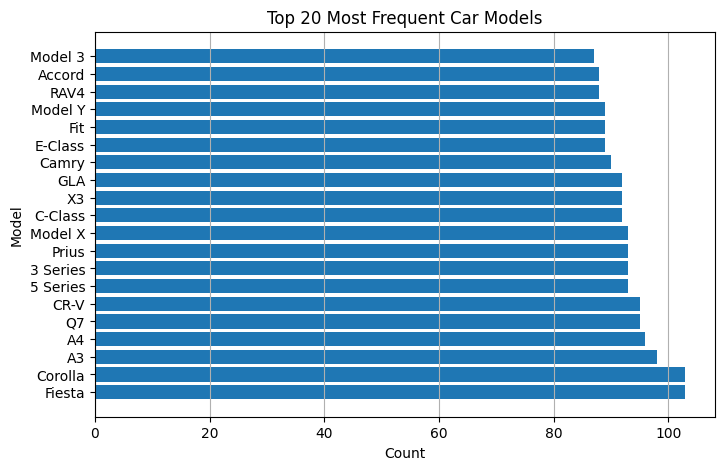

In [38]:
plt.figure(figsize=(8, 5))
plt.barh(c.index, c.values)
plt.title("Top 20 Most Frequent Car Models")
plt.xlabel("Count")
plt.ylabel("Model")
plt.grid(axis='x')
plt.show()

This shows the frequent models of cars

*The highest frequent is fiesta and corolla holding 103 times*

*The least frequent is model 3 with 87 times*

In [39]:
# 5.How does price vary with car manufacturing year? 📊 Plot: Line plot or scatter plot
d=data.groupby('Year')['Price'].mean()
d

,Price
Year,
2000,53094.163441
2001,48944.057706
2002,57197.476000
2003,52260.187373
2004,51517.976900
2005,57534.323592
2006,53437.595930
2007,56464.203545
2008,53104.788716


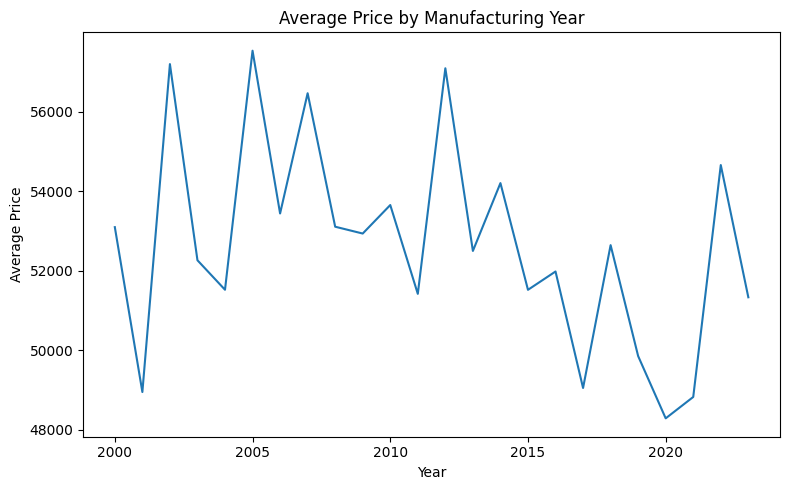

In [40]:
plt.figure(figsize=(8, 5))
plt.plot(d.index,d.values)
plt.title("Average Price by Manufacturing Year")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()

Price vary in years

*The year 2005 has highest price*

*The year 2020 has lowest price*

In [41]:
# 6.How many cars are petrol, diesel, CNG, electric? 📊 Plot: Pie chart or bar chart
e=data['Fuel Type'].value_counts()
e

,count
Fuel Type,
Diesel,655
Petrol,630
Electric,614
Hybrid,601


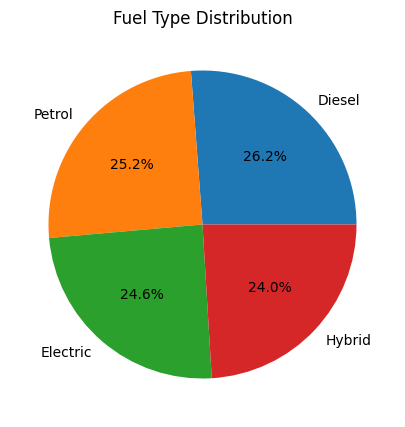

In [42]:
plt.figure(figsize=(8, 5))
plt.pie(e.values, labels=e.index, autopct='%1.1f%%')
plt.title("Fuel Type Distribution")
plt.show()

This shows the Fuel type distributon

*Disel - 655*

*Petrol - 630*

*Electric - 614*

*Hybrid - 601*

In [43]:
# 7.What is the average price for each fuel type? 📊 Plot: Bar chart
f=data.groupby('Fuel Type')['Price'].mean()
f

,Price
Fuel Type,
Diesel,54996.997588
Electric,51103.013534
Hybrid,52547.394759
Petrol,51767.918016


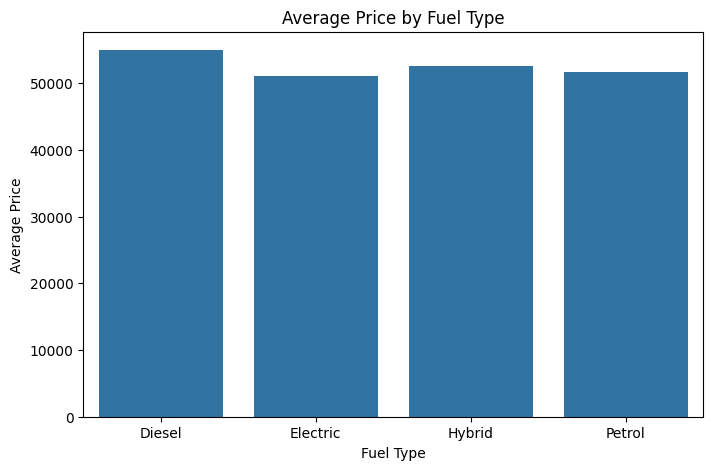

In [44]:
plt.figure(figsize=(8, 5))
sns.barplot(x=f.index, y=f.values)
plt.title("Average Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Average Price")
plt.show()

This Shows the Average price based on fuel type

*Diesel has the highest price*

*Electric has the lowest price*

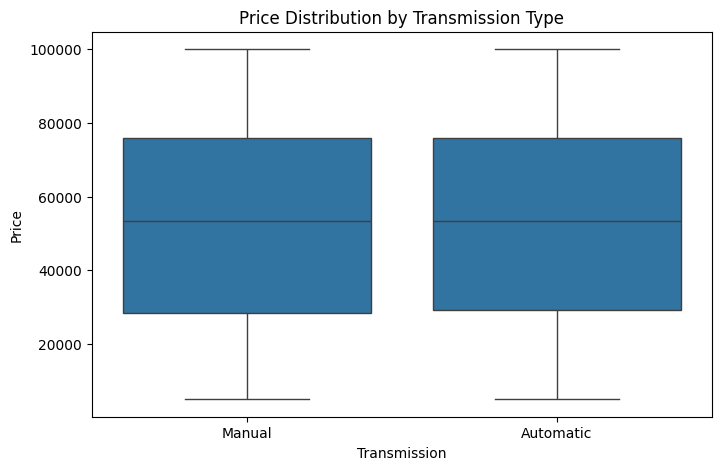

In [45]:
# 8.Does transmission type (Manual/Automatic) affect price? 📊 Plot: Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Transmission', y='Price', data=data)
plt.title("Price Distribution by Transmission Type")
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.show()

This shows the price distribution between Manul and Automatic transmission



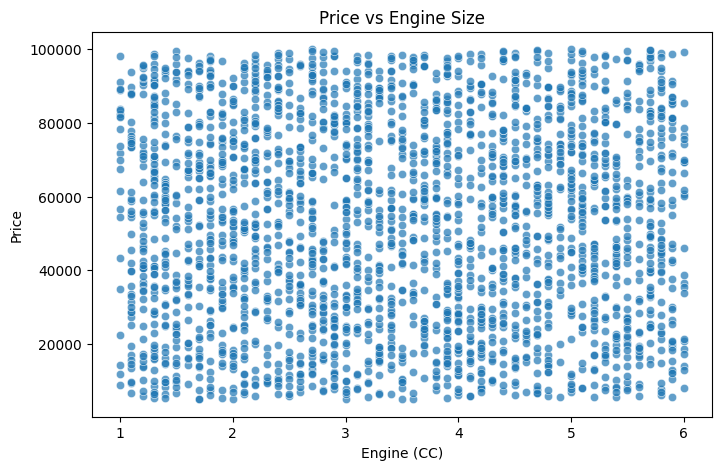

In [46]:
# 9.Does engine size affect price? 📊 Plot: Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Engine Size', y='Price', data=data, alpha=0.7)
plt.title("Price vs Engine Size")
plt.xlabel("Engine (CC)")
plt.ylabel("Price")
plt.show()

This shows the price by engine size


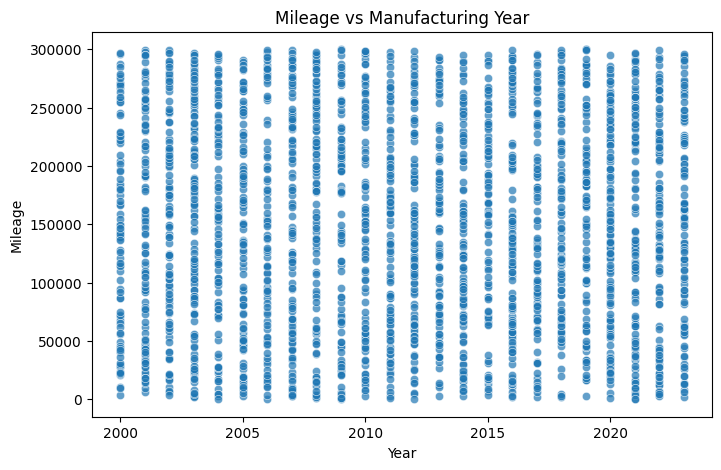

In [47]:
# 10.Do newer cars have higher mileage? 📊 Plot: Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Year', y='Mileage', data=data, alpha=0.7)
plt.title("Mileage vs Manufacturing Year")
plt.xlabel("Year")
plt.ylabel("Mileage")
plt.show()

This shows the mileage by year

In [48]:
# 11.What is the condition distribution (Used/LIke New/New)? 📊 Plot: Pie or bar chart
g=data['Condition'].value_counts()
g

,count
Condition,
Used,855
Like New,836
New,809


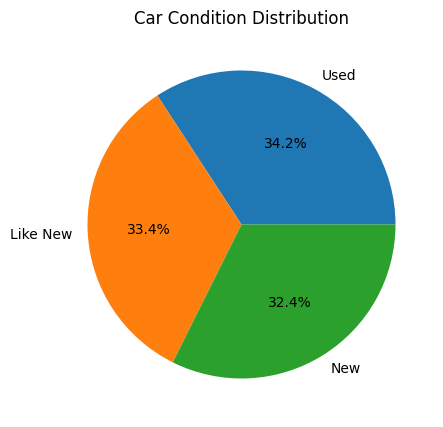

In [49]:
plt.figure(figsize=(8, 5))
plt.pie(g.values, labels=g.index, autopct='%1.1f%%')
plt.title("Car Condition Distribution")
plt.show()

This shows the cars bases on condition

*855 used cars*

*836 like new cars*

*809 new cars*

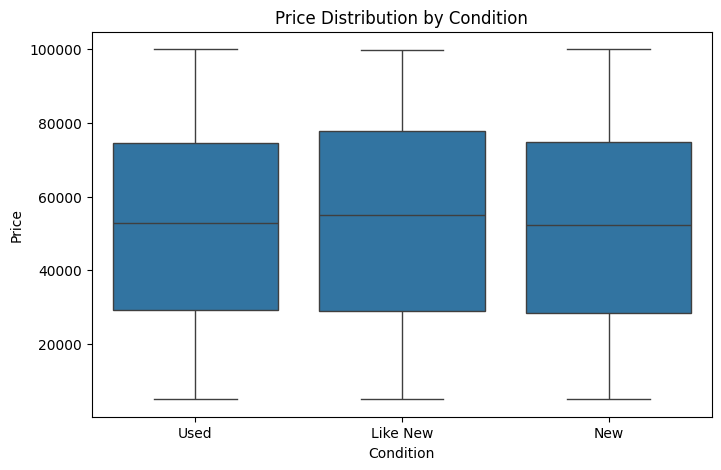

In [50]:
# 12.What is price variation across condition levels? 📊 Plot: Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Condition', y='Price', data=data, order=data['Condition'].value_counts().index)
plt.title("Price Distribution by Condition")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.show()

This shows the price distribution by condition


In [51]:
# 13.How does price differ by brand + fuel type combination? 📊 Plot: Grouped bar chart
h=data.groupby(['Brand', 'Fuel Type'])['Price'].mean()
h

Brand     Fuel Type
Audi      Diesel       56574.073814
          Electric     51376.561170
          Hybrid       50374.120000
          Petrol       49182.028125
BMW       Diesel       59334.373587
          Electric     50654.630879
          Hybrid       55599.859302
          Petrol       50992.418764
Ford      Diesel       52679.123294
          Electric     47298.914706
          Hybrid       52169.371628
          Petrol       54045.716813
Honda     Diesel       50711.301262
          Electric     50602.706667
          Hybrid       55014.680805
          Petrol       51919.030920
Mercedes  Diesel       54449.243494
          Electric     54237.306707
          Hybrid       50099.797125
          Petrol       53719.672870
Tesla     Diesel       56368.296818
          Electric     53285.740600
          Hybrid       51733.169529
          Petrol       52309.159067
Toyota    Diesel       55101.860280
          Electric     49961.358506
          Hybrid       52509.856875
          Petrol       49928.105476
Name: Price, dtype: float64

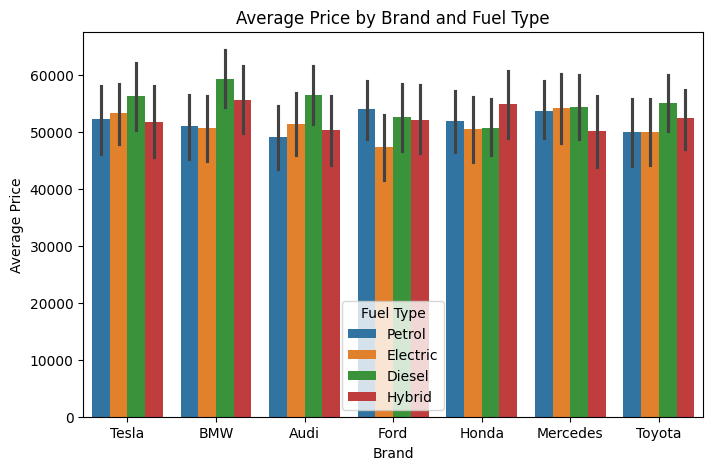

In [52]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Brand', y='Price', hue='Fuel Type', data=data)
plt.title("Average Price by Brand and Fuel Type")
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.show()

This shows price of the car brands based on fuel type

*Disel -*

*   Bmw has the highest price
*   Honda has the least price


*Petrol -*

*   Ford has the highest price
*   Audi has the least price

*Hybrid -*


*   Bmw has the highest price
*   Mercedes has the least price

*Electric -*


*   Mercedes has the hightest price
*   Ford has the least price






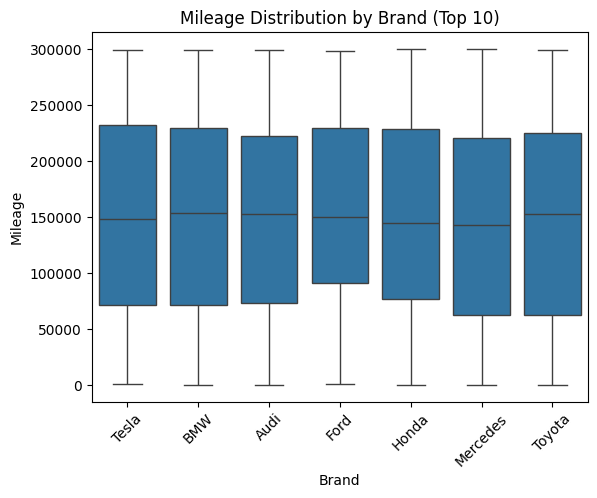

In [53]:
# 14.Are certain brands more fuel-efficient? 📊 Plot: Boxplot of mileage by brand
sns.boxplot(x='Brand', y='Mileage', data=data)
plt.title("Mileage Distribution by Brand (Top 10)")
plt.xlabel("Brand")
plt.ylabel("Mileage")
plt.xticks(rotation=45)
plt.show()

This the mileage distribution by brand

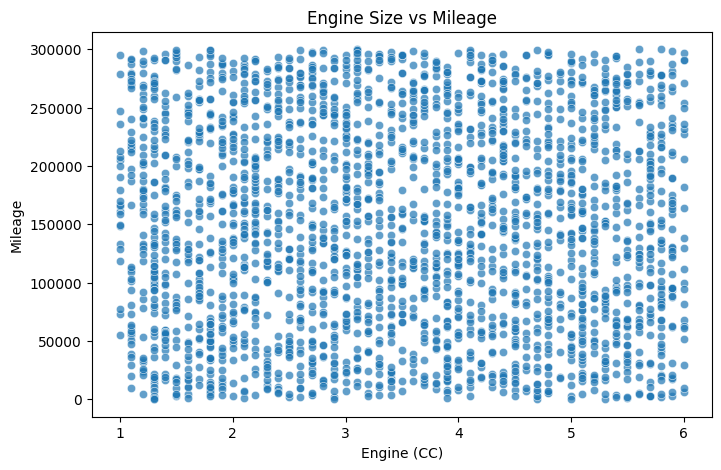

In [54]:
# 15.How are engine size and mileage related? 📊 Plot: Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Engine Size', y='Mileage', data=data, alpha=0.7)
plt.title("Engine Size vs Mileage")
plt.xlabel("Engine (CC)")
plt.ylabel("Mileage")
plt.show()

This shows how thw engine size is realated with mileage

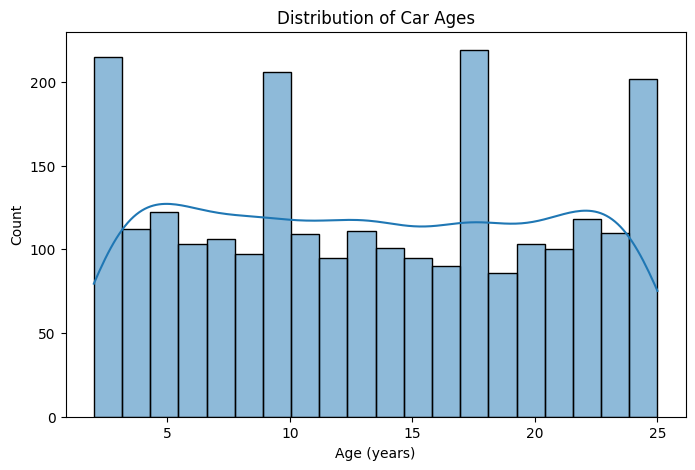

In [55]:
# 16.What is the distribution of car ages in the dataset? 📊 Plot: Histogram
CURRENT_YEAR = 2025
data['Age']=CURRENT_YEAR - data['Year']

plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], kde=True, bins=20)
plt.title("Distribution of Car Ages")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.show()

This shows the age of the cars